In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
# load the model from disk
loaded_model = pickle.load(open('classifier_box_nonBox2.sav', 'rb'))

In [3]:
# Predict on new dataset
newData = pd.read_csv('../Data/FormattedVideos/Ali to Classify/data.csv')
newPred = loaded_model.predict(newData)

In [4]:
# Keep only boxing stances
print(newData.shape)
boxingData = newData[newPred==1][:]
print(boxingData.shape)

(1224983, 51)
(461092, 51)


In [5]:
# Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy import linalg
import itertools


In [16]:
pca = PCA(n_components=2).fit(boxingData)
X = pca.transform(boxingData)
# Compute clustering with Means
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10, verbose = False)
t0 = time.time()
#k_means_out = k_means.fit(boxingData)
k_means_out = k_means.fit(X)
t_batch = time.time() - t0

In [17]:
# Visualize the results on PCA-reduced data
from sklearn.decomposition import PCA

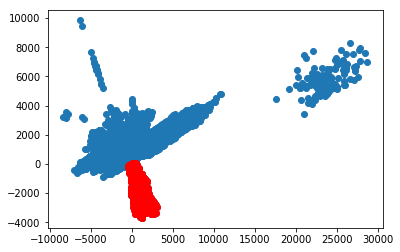

In [107]:
#pca_2d = pca.transform(centers)
#print(pca_2d)
#pl.figure('3 Cluster K-Means')#
plt.plot(X[:,0],X[:,1],"o")
k_lab = 0

a=np.nonzero(k_means_out.labels_==k_lab)[0]
Y= X[a,:]
Y.shape
plt.plot(Y[:,0],Y[:,1],'ro')
out = boxingData.iloc[a,:]
out.to_csv('boxingCluster'+str(k_lab)+'.csv')
#plt.imshow
#pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)

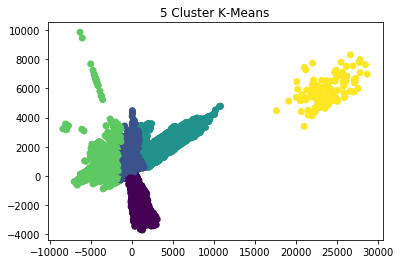

In [19]:
plt.figure('5 Cluster K-Means')

plt.scatter(X[:, 0], X[:, 1], c=k_means_out.labels_)

plt.title('5 Cluster K-Means')

plt.show()

In [13]:
# Compute clustering with Gaussian Mixture
from sklearn import mixture
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-9., 5.)
    #plt.ylim(-3., 6.)
    #plt.xticks(())
    #plt.yticks(())
    plt.title(title)



In [112]:
# Fit a Gaussian mixture with EM using three components
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(boxingData)

(461092, 2)

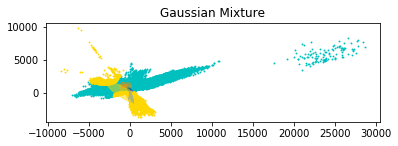

In [21]:
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')
X.shape

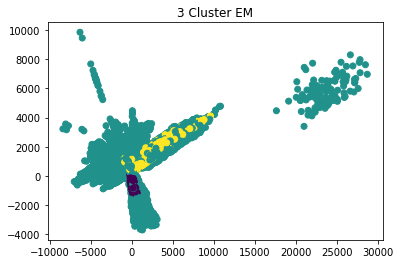

In [114]:
k_out = gmm.predict(boxingData)
plt.figure('3 Cluster EM')

plt.scatter(X[:, 0], X[:, 1], c = k_out)

plt.title('3 Cluster EM')

plt.show()

In [96]:
k_out.predict(boxingData).shape

(461092,)

In [24]:
# Fit a Dirichlet process Gaussian mixture using three components
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(X)

C:\Users\cfraces\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


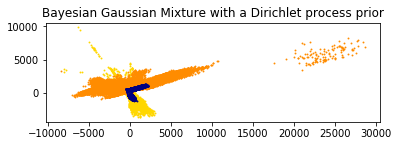

In [88]:
plot_results(X, dpgmm.predict(boxingData), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

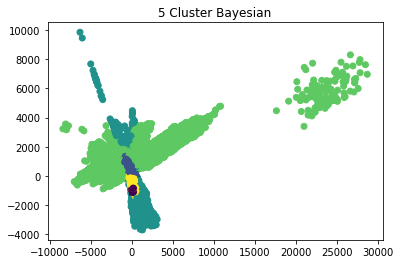

In [25]:
k_out2 = dpgmm.predict(X)
plt.figure('5 Cluster Bayesian GM')

plt.scatter(X[:, 0], X[:, 1], c = k_out2)

plt.title('5 Cluster Bayesian')

plt.show()